<a href="https://colab.research.google.com/github/Datrihi/Automotive_Project/blob/main/auto0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0


In [ ]:
!pip install tensorflow==2.11.0

  Using cached tensorflow-2.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)


In [ ]:
!pip uninstall keras -y

Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0


In [ ]:
!pip install keras==2.11.0

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


In [ ]:
!pip install h5py==2.10.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq "/content/drive/MyDrive/인공지능자동차데이터/rc_car.zip"

replace rc_car/[크기변환][회전]apture_0_000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import os
import random
import fnmatch
import datetime
import pickle

import numpy as np
np.set_printoptions(formatter={'float_kind' : lambda x: "%.4f" %x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}' .format)
pd.set_option('display.max_colwidth', 200)

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image

image_path: /content/rc_car/[크기변환][회전]capture_419_-65.jpg
steering_Angle: -65


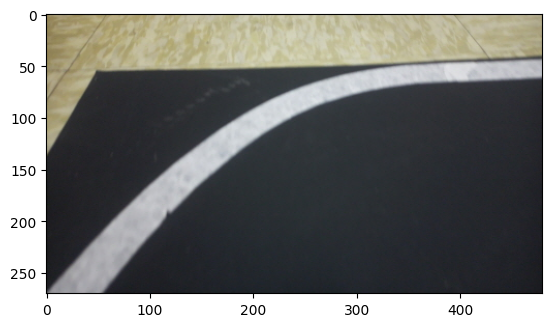

In [ ]:
data_dir = '/content/rc_car'
file_list = os.listdir(data_dir)
image_paths = []
steering_angles = []
pattern = "*.jpg"
for filename in file_list:
	if fnmatch.fnmatch(filename, pattern):
		image_paths.append(os.path.join(data_dir, filename))
		angle = int(filename[-7:-4])
		steering_angles.append(angle)

image_index = 20
plt.imshow(Image.open(image_paths[image_index]))
print("image_path: %s" % image_paths[image_index])
print("steering_Angle: %d" % steering_angles[image_index])
df = pd.DataFrame()
df['ImagePath'] = image_paths
df['Angle'] = steering_angles

(array([591.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1163.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        494.0000]),
 array([-65.0000, -59.8000, -54.6000, -49.4000, -44.2000, -39.0000,
        -33.8000, -28.6000, -23.4000, -18.2000, -13.0000, -7.8000, -2.6000,
        2.6000, 7.8000, 13.0000, 18.2000, 23.4000, 28.6000, 33.8000,
        39.0000, 44.2000, 49.4000, 54.6000, 59.8000, 65.0000]),
 <BarContainer object of 25 artists>)

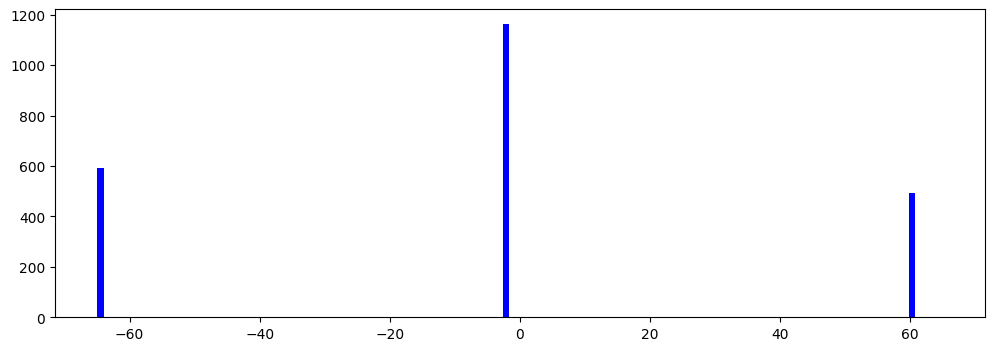

In [ ]:
num_of_bins = 25
hist, bins = np.histogram(df['Angle'], num_of_bins)

fig, axes = plt.subplots(1,1, figsize = (12,4))
axes.hist(df['Angle'], bins=num_of_bins, width=1, color='blue')

Training data:  1798
Validation data: 450


Text(0.5, 1.0, 'Validation Data')

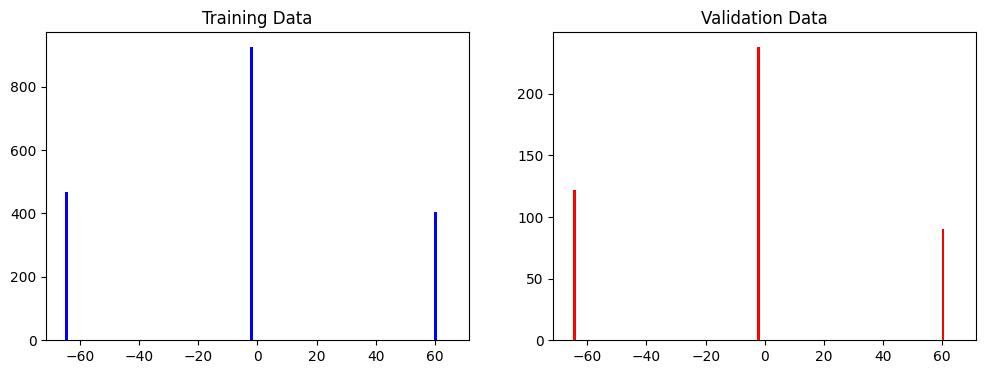

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steering_angles, test_size=0.2)
print("Training data:  %d\nValidation data: %d" % (len(X_train), len(X_valid)))

fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].hist(y_train, bins=num_of_bins, width=1, color='blue')
axes[0].set_title('Training Data')
axes[1].hist(y_valid, bins=num_of_bins, width=1, color='red')
axes[1].set_title('Validation Data')

Text(0.5, 1.0, 'processed')

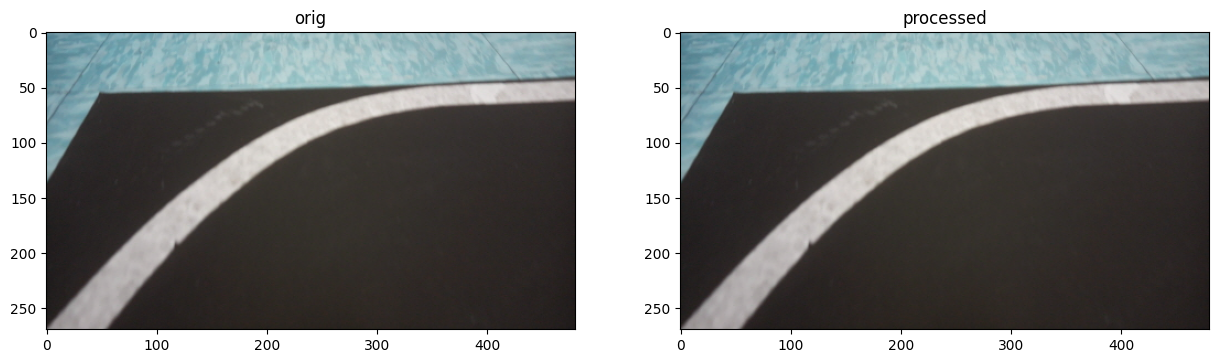

In [ ]:
def my_imread(image_path):
		image = cv2.imread(image_path)
		return image

def img_preprocess(image):
		image = image/255
		return image

fig, axes = plt.subplots(1, 2 , figsize=(15,10))
image_orig = my_imread(image_paths[image_index])
image_processed = img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

In [ ]:
def nvidia_model():
    model = Sequential(name='Nvidia_Model')

    model.add(Conv2D(24, (5,5), strides=(2, 2), input_shape=(270, 480, 3), activation='elu'))
    model.add(Conv2D(36, (5,5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(48, (5,5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(64, (3,3), activation='elu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), activation='elu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))

    model.add(Dense(1))

    optimizer = Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer)

    return model

model = nvidia_model()
print(model.summary())

Model: "Nvidia_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 133, 238, 24)      1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 117, 36)       21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 57, 48)        43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 55, 64)        27712     
                                                                 
 dropout (Dropout)           (None, 29, 55, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 53, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 91584)            

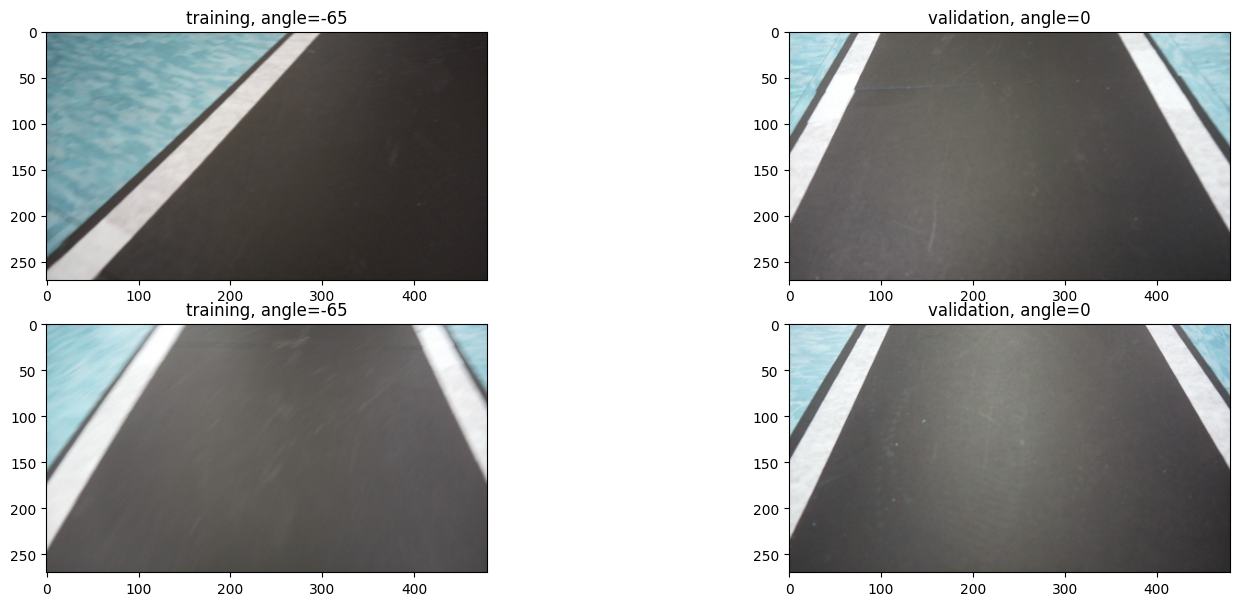

In [ ]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            image_path = image_paths[random_index]
            image = my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]

            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)

        yield( np.asarray(batch_images), np.asarray(batch_steering_angles))

ncol = 2
nrow = 2

X_train_batch, y_train_batch = next(image_data_generator(X_train, y_train, nrow))
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, y_valid, nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(15,6) )
fig.tight_layout()

for i in range(nrow):
    axes[i][0].imshow(X_train_batch[i])
    axes[i][0].set_title("training, angle=%s" % y_train_batch[i])
    axes[i][1].imshow(X_valid_batch[i])
    axes[i][1].set_title("validation, angle=%s" % y_valid_batch[i])

In [ ]:
model_output_dir = "/content/rc_car/h5"

checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_output_dir, 'lane_navigation_check.h5'),
                                                                 verbose=1, save_best_only=True)

history = model.fit(image_data_generator(X_train, y_train, batch_size=100),
                    steps_per_epoch=300, epochs=10, validation_data = image_data_generator(X_train, y_train, batch_size=100),
                    validation_steps=200, verbose=1, shuffle=1, callbacks=[checkpoint_callback])

model.save(os.path.join(model_output_dir, 'lane_navigation_final.h5'))

history_path = os.path.join(model_output_dir, 'history.pickle')
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 678.6683
Epoch 1: val_loss improved from inf to 257.99051, saving model to /content/rc_car/h5/lane_navigation_check.h5
300/300 [==============================] - 291s 949ms/step - loss: 678.6683 - val_loss: 257.9905
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 199.1627
Epoch 2: val_loss improved from 257.99051 to 125.40958, saving model to /content/rc_car/h5/lane_navigation_check.h5
300/300 [==============================] - 284s 948ms/step - loss: 199.1627 - val_loss: 125.4096
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 106.0239
Epoch 3: val_loss improved from 125.40958 to 65.87329, saving model to /content/rc_car/h5/lane_navigation_check.h5
300/300 [==============================] - 291s 971ms/step - loss: 106.0239 - val_loss: 65.8733
Epoch 4/10
300/300 [==============================] - ETA: 0s - loss: 40.3384
Epoch 4: val_loss improved from 65.87329 to 34.77143, 

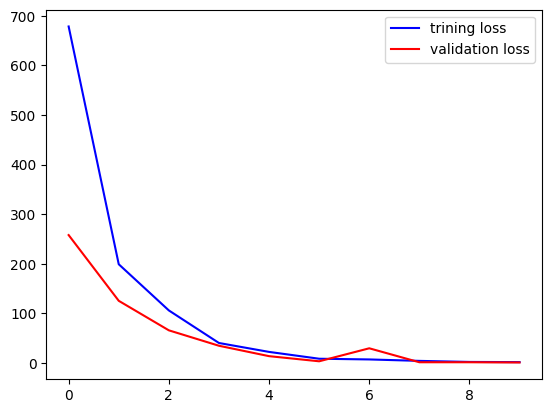

In [ ]:
history.history
history_path = os.path.join(model_output_dir, 'history.pickle')
with open(history_path, 'rb') as f:
    history = pickle.load(f)

history
plt.plot(history['loss'],color='blue')
plt.plot(history['val_loss'],color='red')
plt.legend(["trining loss", "validation loss"])

4/4 [==============================] - 1s 46ms/step
mse = 3.6e+01
r_squared = 98.31%



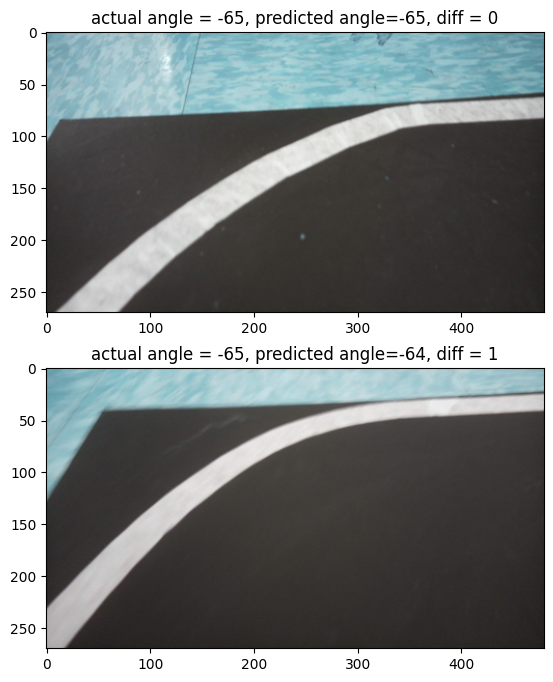

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize_prediction(Y_true, Y_pred):

    mse = mean_squared_error(Y_true, Y_pred)
    r_squared = r2_score(Y_true, Y_pred)

    print(f'mse = {mse:.2}')
    print(f'r_squared = {r_squared:.2%}')
    print()
def predict_and_summarize(X,Y):
    model = load_model(f'{model_output_dir}/lane_navigation_check.h5')
    Y_pred = model.predict(X)
    summarize_prediction(Y, Y_pred)
    return Y_pred

n_tests = 100
X_test, y_test = next(image_data_generator(X_valid, y_valid, batch_size=100))

y_pred = predict_and_summarize(X_test, y_test)

n_tests_show = 2
fig, axes = plt.subplots(n_tests_show, 1, figsize=(10, 4 * n_tests_show))
for i in range(n_tests_show):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"actual angle = {y_test[i]}, predicted angle={int(y_pred[i])}, diff = {int(y_pred[i]) - y_test[i]}")
